In [1]:
import keras
import tensorflow as tf
from tensorflow.keras.datasets import mnist
from keras.models import Sequential 
from keras.layers import  Dense, Conv2D, Flatten, Dropout
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

D:\Anaconda\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [2]:
(x_train, y_train),(x_test, y_test)=mnist.load_data()

In [3]:
#print(mnist.load_data())

In [4]:
x_train.shape, y_train.shape

((60000, 28, 28), (60000,))

In [5]:
from keras.utils import to_categorical

In [6]:
y_train= to_categorical(y_train, num_classes=10)

In [7]:
y_test=to_categorical(y_test, num_classes=10)

In [8]:
x_train=x_train.reshape(-1,28,28,1)/255   # Yeslai normalization garya vanxa
x_test=x_test.reshape(-1,28,28,1)/255

In [10]:
model=Sequential()
model.add(Conv2D(filters=5,kernel_size=(3,3),input_shape=(28,28,1), activation='relu')) #Gray scale ko image xa so 1 RGB vaye 3
model.add(Conv2D(filters=5,kernel_size=(3,3),activation='relu'))
model.add(Flatten())
model.add(Dropout(0.1))
model.add(Dense(10, activation='softmax')) #mnist ko 10 ota categorical data hunxa vanera pailei tha huna parxa
model.summary()

Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 26, 26, 5)         50        
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 24, 24, 5)         230       
_________________________________________________________________
flatten_2 (Flatten)          (None, 2880)              0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 2880)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 10)                28810     
Total params: 29,090
Trainable params: 29,090
Non-trainable params: 0
_________________________________________________________________


In [11]:
model.compile('adam','mse',metrics=['acc'])

In [12]:
history=model.fit(x_train,y_train, epochs=2)

Instructions for updating:
Use tf.cast instead.
Epoch 1/2
60000/60000 [==============================] - 33s 546us/step - loss: 0.0130 - acc: 0.9137
Epoch 2/2
60000/60000 [==============================] - 32s 528us/step - loss: 0.0053 - acc: 0.9665


In [13]:
x_train=x_train.reshape(-1,28,28,1)/255  # Yeslai normalization garya vanxa
x_test=x_test.reshape(-1,28,28,1)/255

In [14]:
test=model.evaluate(x_test,y_test)
print(test)

10000/10000 [==============================] - 3s 273us/step
[0.09001867356300354, 0.1135]


In [15]:
print(history.history.keys())

dict_keys(['loss', 'acc'])


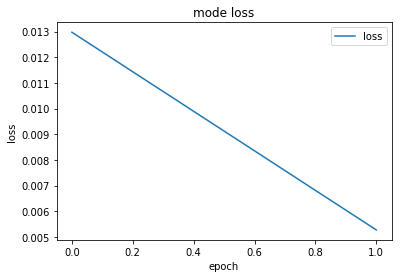

In [16]:
plt.plot(history.history['loss'])
plt.title('mode loss')
plt.legend(['loss','acc'])
plt.ylabel('loss')
plt.xlabel('epoch')
plt.show()

(28, 49)

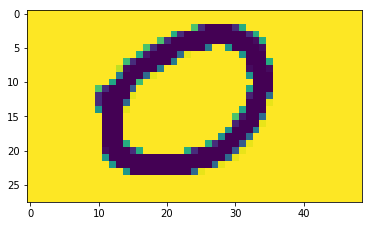

In [17]:
import cv2
prediction_image = cv2.imread('images/zerooooo.png', 1)
prediction_image_gray=cv2.cvtColor(prediction_image,cv2.COLOR_BGR2GRAY)
plt.imshow(prediction_image_gray)

prediction_image_gray.shape

In [18]:
prediction_image_resized=cv2.resize(prediction_image_gray,(28,28))\

In [19]:
prediction_image_reshaped=prediction_image_resized.reshape(-1,28,28,1)/255

In [20]:
prediction=model.predict(prediction_image_reshaped)

In [21]:
np.argmax(prediction)

0

In [22]:
prediction

array([[5.2933830e-01, 3.1413967e-03, 4.5585138e-04, 1.3768665e-02,
        4.4978647e-03, 2.1339740e-01, 2.0461878e-01, 1.5654394e-06,
        3.0773140e-02, 7.0279066e-06]], dtype=float32)

In [23]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 26, 26, 5)         50        
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 24, 24, 5)         230       
_________________________________________________________________
flatten_2 (Flatten)          (None, 2880)              0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 2880)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 10)                28810     
Total params: 29,090
Trainable params: 29,090
Non-trainable params: 0
_________________________________________________________________


In [24]:
test=model.evaluate(x_test,y_test)
print(test)


10000/10000 [==============================] - 3s 269us/step
[0.09001867356300354, 0.1135]


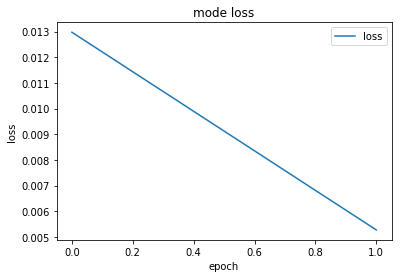

In [25]:
plt.plot(history.history['loss'])
plt.title('mode loss')
plt.legend(['loss','acc'])
plt.ylabel('loss')
plt.xlabel('epoch')
plt.show()